# Handling and Encoding Categorical Data

In this notebook, we will explore various techniques to handle categorical data, including One-Hot Encoding (OHE), Label Encoding, Binning, and Transformations such as Log and Power transforms. Understanding and implementing these methods is crucial when pre-processing data for machine learning algorithms.

## One-Hot Encoding (OHE) and Label Encoding

We'll start by demonstrating OHE and Label Encoding using a sample dataset. These techniques are essential for converting categorical data into a suitable format for use by machine learning algorithms.


In [1]:
# Necessary imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Sample dataset
data = {
    'color': ['red', 'green', 'blue'],
    # Assuming 'size' is ordinal with known order
    'size': ['small', 'large', 'medium'],
}

df = pd.DataFrame(data)
print(df)

# Applying One-Hot Encoding
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[['color']])
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=ohe.get_feature_names_out(['color']))
print(ohe_df)

# Applying Label Encoding
le = LabelEncoder()
df['size_encoded'] = le.fit_transform(df['size'])
print(df[['size', 'size_encoded']])


   color    size
0    red   small
1  green   large
2   blue  medium
   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
     size  size_encoded
0   small             2
1   large             0
2  medium             1


In [2]:
print(type(ohe_result))
print(type(ohe_result.toarray()))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


### Curse of dimensionality

In [7]:
# Simulating data with a higher number of categories
data_high_dim = {
    'color': ['color' + str(i) for i in range(1, 101)]  # Simulating a feature with 100 categories
}

df_high_dim = pd.DataFrame(data_high_dim)
df_high_dim

,color
0,color1
1,color2
2,color3
3,color4
4,color5
...,...
95,color96
96,color97
97,color98
98,color99


In [8]:

# Applying One-Hot Encoding
ohe = OneHotEncoder()
ohe_result_high_dim = ohe.fit_transform(df_high_dim)
ohe_df_high_dim = pd.DataFrame(ohe_result_high_dim.toarray(), columns=ohe.get_feature_names_out())

print(f"Original feature count: {df_high_dim.shape[1]}")
print(f"Features after One-Hot Encoding: {ohe_df_high_dim.shape[1]}")

# Here you can discuss the jump from 1 feature to 100 features and the potential implications.


Original feature count: 1
Features after One-Hot Encoding: 100


In [9]:
ohe_df_high_dim 

,color_color1,color_color10,color_color100,color_color11,color_color12,color_color13,color_color14,color_color15,color_color16,color_color17,...,color_color90,color_color91,color_color92,color_color93,color_color94,color_color95,color_color96,color_color97,color_color98,color_color99
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Note the increase in dimensions after applying OHE, commonly referred to as the "Curse of Dimensionality." This phenomenon can make the learning process slower and demands higher computational resources.

## Binning and Transformations

Now, we'll explore binning and transformations like log and power transforms, which are essential for handling continuous numerical data. These techniques can improve the performance of machine learning models, especially those assuming a normal distribution of the data.


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


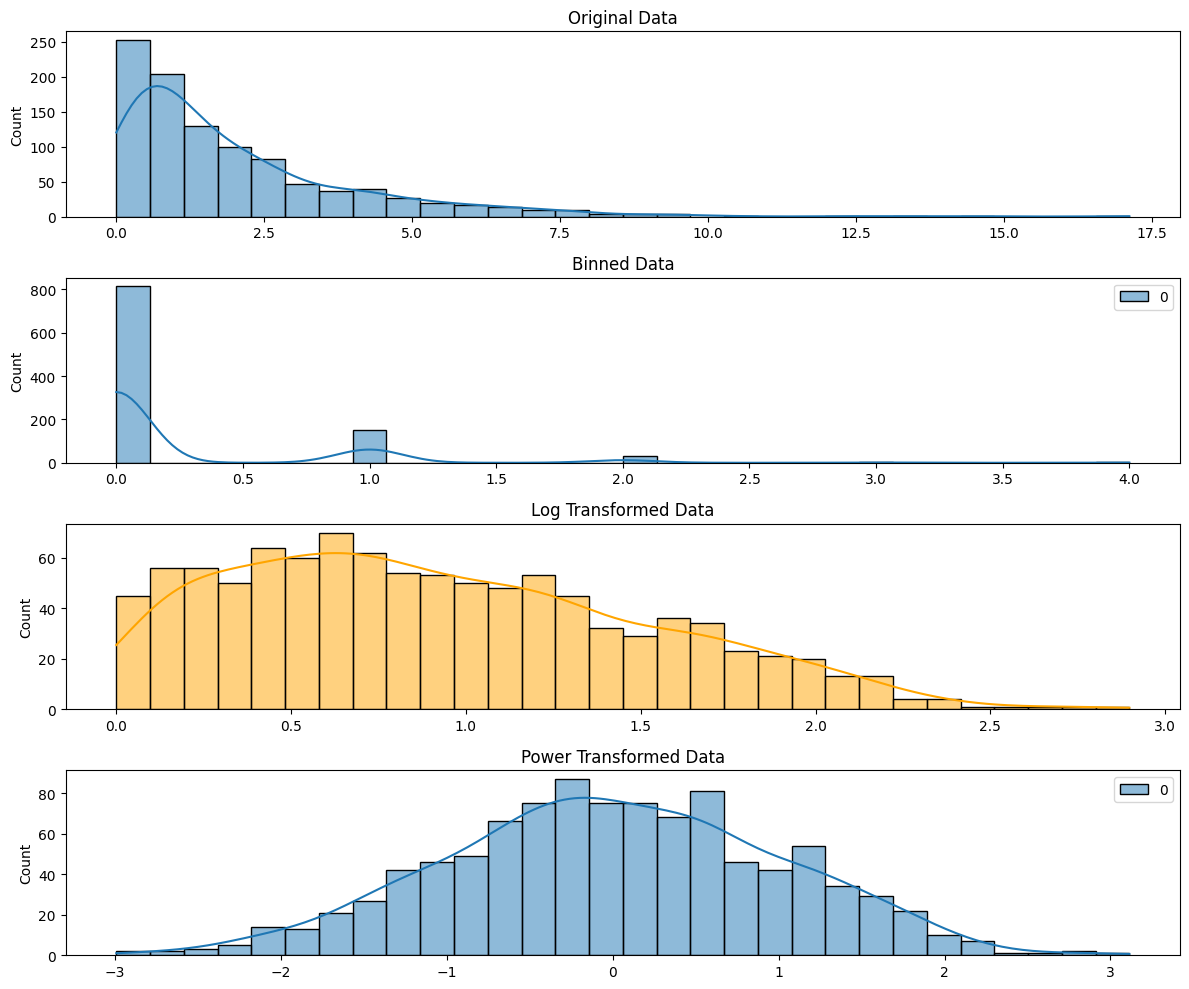

In [ ]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a sample dataset
#By setting np.random.seed(0), the continuous_data array generated by the 
# np.random.exponential function will have the same values every time you run this code. 
# If you remove np.random.seed(0), the values in continuous_data would vary each time.
np.random.seed(0)
continuous_data = np.random.exponential(scale=2, size=1000)

# Converting numerical data into bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_binned = discretizer.fit_transform(continuous_data.reshape(-1, 1))

# Log transform
log_transformed = np.log1p(continuous_data)

# Power transform (Box-Cox)
pt = PowerTransformer(method='box-cox')
power_transformed = pt.fit_transform(continuous_data.reshape(-1, 1))

# Plotting the original, binned, and transformed data
plt.figure(figsize=(12, 10))

plt.subplot(411)
sns.histplot(continuous_data, bins=30, kde=True)
plt.title('Original Data')

plt.subplot(412)
sns.histplot(data_binned, bins=30, kde=True, color='green')
plt.title('Binned Data')

plt.subplot(413)
sns.histplot(log_transformed, bins=30, kde=True, color='orange')
plt.title('Log Transformed Data')

plt.subplot(414)
sns.histplot(power_transformed, bins=30, kde=True, color='red')
plt.title('Power Transformed Data')

plt.tight_layout()
plt.show()


By comparing the histograms, we can see how binning and transformations affect the distribution of the data. Binning helps in reducing the effects of minor observation errors, the log transformation helps in reducing the skewness, and the power transform makes the data more Gaussian-like, which can be beneficial for many machine learning algorithms.
